In [1]:
import mne
import numpy as np
import glob
from past.builtins import unicode
import xlrd
import pandas as pd

In [2]:
#读取SE训练数据
data_dir_file=r"../SE_train_processed/"
train_data_file_path=sorted(glob.glob(data_dir_file+"*"))
# data_file_path
print(len(train_data_file_path))

#读取SE测试数据
data_dir_file=r"../SE_test_processed/"
test_data_file_path=sorted(glob.glob(data_dir_file+"*"))
# data_file_path
print(len(test_data_file_path))

1415
31


In [3]:
# data_file_path

In [4]:
path = "../SE_parameter/train_matched_stimulate_parameter.xlsx"
df_train = pd.read_excel(path,engine='openpyxl')
df_train=df_train.drop(['Unnamed: 0'],axis=1)
df_train

,parameter,result
0,3,1
1,3,1
2,3,1
3,3,1
4,3,1
...,...,...
1410,2,1
1411,2,1
1412,2,1
1413,2,1


In [5]:
path = "../SE_parameter/test_matched_stimulate_parameter.xlsx"
df_test = pd.read_excel(path,engine='openpyxl')
df_test=df_test.drop(['Unnamed: 0'],axis=1)
df_test

,parameter,result
0,1,1
1,2,1
2,4,1
3,3,1
4,3,1
5,1,0
6,2,1
7,4,1
8,2,1
9,1,1


In [6]:
#发作为1；未发作为0
y_train=[]
for i in range(df_train.shape[0]):
    if df_train.iloc[i,1]==1:
        y_train.append(1)
    else:
        y_train.append(0)
print(len(y_train))
print(sum(y_train))

#发作为1；未发作为0
y_test=[]
for i in range(df_test.shape[0]):
    if df_test.iloc[i,1]==1:
        # 找不到未发作，即发作，记为1
        y_test.append(1)
    else:
        y_test.append(0)
print(len(y_test))
print(sum(y_test))

1415
655
31
28


In [7]:
#选择的通道数
channel_num=15
#训练集的SE切片长度
train_SE_len=16
#测试集的SE切片长度
test_SE_len=16

In [8]:
# 训练集
# 切成2s一段，不用乘通道数
y_long_data=[]
for i in y_train:
    for j in range((int)(train_SE_len/2)):
        y_long_data.append(i)
y_train=y_long_data
print(len(y_train))

11320


In [9]:
y_long_test_data=[]
for i in y_test:
    for j in range((int)(test_SE_len/2)):
        y_long_test_data.append(i)
y_test=y_long_test_data
print(len(y_test))

248


In [10]:
import scipy.signal
import scipy.io as scio   
#设定为2s一段
samps = 2

In [11]:
x_train=[]
for i in train_data_file_path:
    raw = mne.io.read_raw_fif(i)
    data,time=raw[:]
    for j in range(0,train_SE_len,samps):
        data_temp = []
        for k in range (channel_num):
            data_temp.append(data[k][j*256:(j+samps)*256])         
        x_train.append(data_temp)   

Opening raw data file ../SE_train_processed\AV-严聪慧-20220803(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220803(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220803(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220803(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220803(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220803random_flip_1.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220803

C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-严聪慧-20220803(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-严聪慧-20220803(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-严聪慧-20220803(original).fif) does not conf

Opening raw data file ../SE_train_processed\AV-严聪慧-20220805random_flip_10.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220805random_flip_11.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220805random_flip_12.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220805random_flip_13.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220805random_flip_14.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220805random_flip_15.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-习俊豪-20220530(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-严聪慧-20220805random_flip_10.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-严聪慧-20220805random_flip_11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-严聪慧-20220805random_flip_12.

Ready.
Opening raw data file ../SE_train_processed\AV-习俊豪-20220530(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-习俊豪-20220606(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-习俊豪-20220606(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-习俊豪-20220606(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-习俊豪-20220606(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-习俊豪-20220606(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-付宇欣-2022

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-倪泽菁-20220829(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-倪泽菁-20220829(scale_down).fif...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-习俊豪-20220530(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-习俊豪-20220606(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-习俊豪-20220606(jitter).fif) does not conf

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-倪泽菁-20220829(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-倪泽菁-20220831(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-倪泽菁-20220831(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-倪泽菁-20220831(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-倪泽菁-20220831(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-倪泽菁-20220831(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    1

Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220803(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220803(original).fif...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-倪泽菁-20220829(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-倪泽菁-20220831(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-倪泽菁-20220831(jitter).fif) does not conf

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220803(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220803(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220805(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220805(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220805(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220805(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...   

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴启洲-20220706random_flip_5.fif...
Isotrak not found


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-吴华丽-20220803(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-吴华丽-20220803(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-吴华丽-20220803(scale_up).fif) does 

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴启洲-20220706random_flip_6.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴启洲-20220706random_flip_7.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴启洲-20220706random_flip_8.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴启洲-20220706random_flip_9.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴启洲-20220708(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴启洲-20220708(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 se

Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220829random_flip_21.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220829random_flip_22.fif...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-吴启洲-20220706random_flip_6.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-吴启洲-20220706random_flip_7.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-吴启洲-20220706random_flip_8.fif

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220829random_flip_23.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220829random_flip_24.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220829random_flip_25.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220829random_flip_26.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220829random_flip_27.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220829random_flip_28.fif...
Isotrak not found
    Range : 0 ..

C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-唐心诚-20220829random_flip_22.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-唐心诚-20220829random_flip_23.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-唐心诚-20220829random_flip_24.

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220831random_flip_32.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220831random_flip_33.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220831random_flip_34.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220831random_flip_35.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220831random_flip_4.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220831random_flip_5.fif...
Isotrak not found
    Range : 0 ... 

Ready.
Opening raw data file ../SE_train_processed\AV-尤李心怡-20220824(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-尤李心怡-20220824(scale_down).fif...
Isotrak not found


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-唐心诚-20220831random_flip_31.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-唐心诚-20220831random_flip_32.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-唐心诚-20220831random_flip_33.

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-尤李心怡-20220824(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张凯轩-20220708(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张凯轩-20220708(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张凯轩-20220708(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张凯轩-20220708(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张凯轩-20220708(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-尤李心怡-20220824(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-张凯轩-20220708(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-张凯轩-20220708(jitter).fif) does not con

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220819random_flip_15.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220819random_flip_16.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220819random_flip_17.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220819random_flip_18.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220819random_flip_19.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220819random_flip_2.fif...
Isotrak not found
    Range : 0 ...

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220822random_flip_25.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220822random_flip_26.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220822random_flip_27.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-张海峰-20220819random_flip_14.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-张海峰-20220819random_flip_15.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-张海峰-20220819random_flip_16.

Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220822random_flip_28.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220822random_flip_29.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220822random_flip_3.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220822random_flip_30.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220822random_flip_31.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220822random_flip_32.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220824random_flip_7.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220824random_flip_8.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-张海峰-20220822random_flip_28.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-张海峰-20220822random_flip_29.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-张海峰-20220822random_flip_3.f

Opening raw data file ../SE_train_processed\AV-张海峰-20220824random_flip_9.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220826(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220826(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220826(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220826(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220826(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220826

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220713random_flip_15.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-张海峰-20220824random_flip_9.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-张海峰-20220826(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-张海峰-20220826(jitter).fif) does not c

Opening raw data file ../SE_train_processed\AV-徐洋忠-20220713random_flip_16.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220713random_flip_17.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220713random_flip_18.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220713random_flip_19.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220713random_flip_2.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220713random_flip_20.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_p

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220720random_flip_18.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220720random_flip_19.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220720random_flip_2.fif...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-徐洋忠-20220713random_flip_16.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-徐洋忠-20220713random_flip_17.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-徐洋忠-20220713random_flip_18.

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220720random_flip_20.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220720random_flip_21.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220720random_flip_22.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220720random_flip_23.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220720random_flip_24.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220720random_flip_25.fif...
Isotrak not found
    Range : 0 ..

Ready.
Opening raw data file ../SE_train_processed\AV-施佩玲-20220624random_flip_26.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-施佩玲-20220624random_flip_27.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-施佩玲-20220624random_flip_28.fif...
Isotrak not found


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-徐洋忠-20220720random_flip_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-徐洋忠-20220720random_flip_20.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-徐洋忠-20220720random_flip_21.f

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-施佩玲-20220624random_flip_29.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-施佩玲-20220624random_flip_3.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-施佩玲-20220624random_flip_30.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-施佩玲-20220624random_flip_31.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-施佩玲-20220624random_flip_32.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-施佩玲-20220624random_flip_33.fif...
Isotrak not found


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Opening raw data file ../SE_train_processed\AV-王云芝-20220722(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王云芝-20220722(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王云芝-20220725(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王云芝-20220725(jitter).fif...
Isotrak not found


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-熊姗姗-20220713random_flip_34.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-熊姗姗-20220713random_flip_35.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-熊姗姗-20220713random_flip_4.f

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王云芝-20220725(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王云芝-20220725(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王云芝-20220725(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王云芝-20220725random_flip_1.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王云芝-20220725random_flip_10.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王云芝-20220725random_flip_11.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王敏敏-20220831(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王敏敏-20220902(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王敏敏-20220902(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王敏敏-20220902(original).fif...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-王云芝-20220725(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-王云芝-20220725(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-王云芝-20220725(scale_up).fif) does 

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王敏敏-20220902(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王敏敏-20220902(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220722(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220722(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220722(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220722(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...   

Ready.
Opening raw data file ../SE_train_processed\AV-祝煜达-20220523random_flip_19.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祝煜达-20220523random_flip_2.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祝煜达-20220523random_flip_20.fif...
Isotrak not found


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-王敏敏-20220902(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-王敏敏-20220902(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-王诗雯-20220722(flip).fif) does not 

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祝煜达-20220523random_flip_21.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祝煜达-20220523random_flip_22.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祝煜达-20220523random_flip_23.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祝煜达-20220523random_flip_24.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祝煜达-20220523random_flip_25.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祝煜达-20220523random_flip_26.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.00

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-肖敏霞-20220902(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-肖敏霞-20220902(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-祝煜达-20220523random_flip_21.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-祝煜达-20220523random_flip_22.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-祝煜达-20220523random_flip_23.

Opening raw data file ../SE_train_processed\AV-肖敏霞-20220902(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-肖敏霞-20220902(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-肖敏霞-20220902(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-肖敏霞-20220905(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-肖敏霞-20220905(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-肖敏霞-20220905(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-肖敏霞-20220905(sc

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-蔡淼-20220620(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-蔡淼-20220620(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-蔡淼-20220620(original).fif...
Isotrak not found


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-肖敏霞-20220902(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-肖敏霞-20220902(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-肖敏霞-20220902(scale_up).fif) does 

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-蔡淼-20220620(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-蔡淼-20220620(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-蔡淼-20220622(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-蔡淼-20220622(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-蔡淼-20220622(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-蔡淼-20220622(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Open

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220706random_flip_10.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220706random_flip_11.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220706random_flip_12.fif...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-蔡淼-20220620(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-蔡淼-20220620(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-蔡淼-20220622(flip).fif) does not con

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220706random_flip_13.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220706random_flip_14.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220706random_flip_15.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220706random_flip_16.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220706random_flip_17.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220706random_flip_18.fif...
Isotrak not found
    Range : 0 ... 4095

Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220708random_flip_23.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220708random_flip_24.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220708random_flip_25.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220708random_flip_26.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-雷磊-20220706random_flip_12.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-雷磊-20220706random_flip_13.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-雷磊-20220706random_flip_14.fif

Opening raw data file ../SE_train_processed\AV-雷磊-20220708random_flip_27.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220708random_flip_28.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220708random_flip_29.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220708random_flip_3.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220708random_flip_30.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220708random_flip_31.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_process

C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-雷磊-20220708random_flip_27.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-雷磊-20220708random_flip_28.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-雷磊-20220708random_flip_29.fif

In [12]:
x_train=np.array(x_train)
x_train.shape

(11320, 15, 512)

In [13]:
x_test=[]
for i in test_data_file_path:
    raw = mne.io.read_raw_fif(i)
    data,time=raw[:]
    for j in range(0,test_SE_len,samps):
        data_temp = []
        for k in range (channel_num):
            data_temp.append(data[k][j*256:(j+samps)*256])         
        x_test.append(data_temp)  

Opening raw data file ../SE_test_processed\AV-刘锦珍-20220725.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-刘锦珍-20220727.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-刘锦珍-20220729.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-刘锦珍-20220801.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-张会-20220713.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-张会-20220715.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-张会-20220718.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    

C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2441847617.py:3: RuntimeWarning: This filename (../SE_test_processed\AV-刘锦珍-20220725.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2441847617.py:3: RuntimeWarning: This filename (../SE_test_processed\AV-刘锦珍-20220727.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22140\2441847617.py:3: RuntimeWarning: This filename (../SE_test_processed\AV-刘锦珍-20220729.fif) does not conform to MNE naming conventio

In [14]:
x_test=np.array(x_test)
x_test.shape

(248, 15, 512)

In [15]:
# 引入刺激参数
ECT_code = []

for i in range(df_train.shape[0]):
    if df_train.iloc[i,0] == 1:
        ECT_code.append([0,0])
    if df_train.iloc[i,0] == 2:
        ECT_code.append([0,1])
    if df_train.iloc[i,0] == 3:
        ECT_code.append([1,0])
    if df_train.iloc[i,0] == 4:
        ECT_code.append([1,1])

ECT_code = np.array(ECT_code)
#不再乘通道
long_ECT_code = [i for i in ECT_code for k in range((int)(train_SE_len/2))]
long_ECT_code = np.array(long_ECT_code)
long_ECT_code.shape

(11320, 2)

In [16]:
# 引入刺激参数
test_ECT_code = []

for i in range(df_test.shape[0]):
    if df_test.iloc[i,0] == 1:
        test_ECT_code.append([0,0])
    if df_test.iloc[i,0] == 2:
        test_ECT_code.append([0,1])
    if df_test.iloc[i,0] == 3:
        test_ECT_code.append([1,0])
    if df_test.iloc[i,0] == 4:
        test_ECT_code.append([1,1])

test_ECT_code = np.array(test_ECT_code)
#改成了15通道
long_ECT_code_test = [i for i in test_ECT_code for k in range((int)(test_SE_len/2))]
long_ECT_code_test = np.array(long_ECT_code_test)
long_ECT_code_test.shape

(248, 2)

In [17]:
x_train=np.array(x_train)
y_train=np.array(y_train)#方便实用validation_split
long_ECT_code = np.array(long_ECT_code)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
print(x_train.shape,x_test.shape)

(11320, 15, 512, 1) (248, 15, 512, 1)


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,Concatenate
from tensorflow.keras.layers import Conv1D, MaxPooling1D

In [19]:
#模型1
#input1->conv1->pool1->conv2->pool2->conv3->pool3->flatten->dense1->dense2->concatenate->dense3->out
input1=tf.keras.layers.Input(shape=(15,512,1))#15通道2s数据
input2=tf.keras.layers.Input(shape=(2,))#刺激参数

conv1=tf.keras.layers.Conv2D(32,(3,3),padding='same',activation='relu')(input1)
norm1=tf.keras.layers.BatchNormalization()(conv1)
pool1=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(norm1)#64*256
drop1=tf.keras.layers.Dropout(0.1)(pool1)

conv2=tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu')(drop1)
norm2=tf.keras.layers.BatchNormalization()(conv2)
pool2=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(norm2)#32*128
drop2=tf.keras.layers.Dropout(0.2)(pool2)

conv3=tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu')(drop2)
norm3=tf.keras.layers.BatchNormalization()(conv3)
pool3=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(norm3)#16*64
drop3=tf.keras.layers.Dropout(0.3)(pool3)

flatten1=tf.keras.layers.Flatten()(drop3)

dense1=tf.keras.layers.Dense(128,activation='relu')(flatten1)
drop4=tf.keras.layers.Dropout(0.2)(dense1)

dense3=tf.keras.layers.Dense(32,activation='relu')(input2)
# dense4=tf.keras.layers.Dense(16,activation='relu')(dense3)

concatenate1=tf.keras.layers.Concatenate()([drop4,dense3])

dense5=tf.keras.layers.Dense(32,activation='relu')(concatenate1)
drop5=tf.keras.layers.Dropout(0.3)(dense5)
# dense3 = tf.keras.layers.Dense(20,activation='relu')(dense2)
out=tf.keras.layers.Dense(1,activation='sigmoid')(drop5)

# model=tf.keras.models.Model(inputs=input1,outputs=out)
model=tf.keras.models.Model(inputs=[input1,input2],outputs=out)

In [35]:
#模型2
input1=tf.keras.layers.Input(shape=(x_train.shape[1],1))#15通道2s数据
input2=tf.keras.layers.Input(shape=(2,))#刺激参数

conv1=tf.keras.layers.Conv1D(32,3,padding='same',activation='relu')(input1)
norm1=tf.keras.layers.BatchNormalization()(conv1)
pool1=tf.keras.layers.MaxPooling1D(pool_size=2,strides=2,padding='same')(norm1)#64*256
drop1=tf.keras.layers.Dropout(0.2)(pool1)

# reshape1=tf.keras.layers.Reshape((32,8,256,2))(drop1)
lstm1 = tf.keras.layers.LSTM(32,return_sequences=True)(drop1)
lstm2=tf.keras.layers.LSTM(16)(lstm1)

flatten1=tf.keras.layers.Flatten()(lstm2)

dense1=tf.keras.layers.Dense(10,activation='relu')(flatten1)

concatenate1=tf.keras.layers.Concatenate()([dense1,input2])

out=tf.keras.layers.Dense(1,activation='sigmoid')(concatenate1)

model=tf.keras.models.Model(inputs=[input1,input2],outputs=out)

In [20]:
#模型3
input1=tf.keras.layers.Input(shape=(15,512,1))#15通道2s数据
input2=tf.keras.layers.Input(shape=(2,))#刺激参数

conv1=tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu')(input1)
norm1=tf.keras.layers.BatchNormalization()(conv1)
pool1=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(norm1)#64*256
drop1=tf.keras.layers.Dropout(0.1)(pool1)

reshape1=tf.keras.layers.Reshape((1,8,256,128))(drop1)
lstm1=tf.keras.layers.ConvLSTM2D(64,(3,3),return_sequences=True)(reshape1)
lstm2=tf.keras.layers.ConvLSTM2D(32,(3,3))(reshape1)

flatten1=tf.keras.layers.Flatten()(lstm2)

dense1=tf.keras.layers.Dense(10,activation='relu')(flatten1)

concatenate1=tf.keras.layers.Concatenate()([dense1,input2])

out=tf.keras.layers.Dense(1,activation='sigmoid')(concatenate1)

model=tf.keras.models.Model(inputs=[input1,input2],outputs=out)

In [21]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 15, 512, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_3 (Conv2D)              (None, 15, 512, 128  1280        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_3 (BatchNo  (None, 15, 512, 128  512        ['conv2d_3[0][0]']               
 rmalization)                   )                                                           

In [22]:
tf.keras.utils.plot_model(model, to_file="../img/model.png",show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [23]:
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='binary_crossentropy',  # 损失均方误差
              optimizer=adam,  # 优化器
              metrics=['accuracy']
#                        ,'Precision','Recall']
             )

E:\anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [24]:
#方便命名模型
my_epochs=15
my_batch_size=64
my_validation_split=0.28
history = model.fit([x_train,long_ECT_code], y_train, 
                    batch_size = my_batch_size,
                    epochs = my_epochs,
                    verbose = 1,
                    validation_split = my_validation_split
                   )

Epoch 1/15
142/142 [==============================] - 147s 1s/step - loss: 0.4418 - accuracy: 0.7845 - val_loss: 0.7719 - val_accuracy: 0.3697
Epoch 2/15
142/142 [==============================] - 142s 1000ms/step - loss: 0.2156 - accuracy: 0.8990 - val_loss: 0.8449 - val_accuracy: 0.4797
Epoch 3/15
142/142 [==============================] - 142s 998ms/step - loss: 0.1550 - accuracy: 0.9230 - val_loss: 1.0422 - val_accuracy: 0.5261
Epoch 4/15
142/142 [==============================] - 139s 978ms/step - loss: 0.1381 - accuracy: 0.9215 - val_loss: 1.3651 - val_accuracy: 0.4854
Epoch 5/15
142/142 [==============================] - 140s 984ms/step - loss: 0.1305 - accuracy: 0.9256 - val_loss: 1.7030 - val_accuracy: 0.4996
Epoch 6/15
142/142 [==============================] - 140s 985ms/step - loss: 0.1305 - accuracy: 0.9262 - val_loss: 1.7668 - val_accuracy: 0.5084
Epoch 7/15
142/142 [==============================] - 140s 983ms/step - loss: 0.1246 - accuracy: 0.9251 - val_loss: 1.4228 - v

In [25]:
train_result = model.evaluate([x_train,long_ECT_code],y_train)

354/354 [==============================] - 31s 86ms/step - loss: 0.5078 - accuracy: 0.8488


In [26]:
x_test=np.array(x_test)
y_test=np.array(y_test)
long_ECT_code_test = np.array(long_ECT_code_test)
test_result = model.evaluate([x_test,long_ECT_code_test],y_test)

8/8 [==============================] - 1s 79ms/step - loss: 2.3008 - accuracy: 0.4113


In [27]:
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']
loss = history.history['loss']
val_loss=history.history['val_loss']
# precision=history.history['precision']
# val_precision=history.history['val_precision']
# recall=history.history['recall']
# val_recall=history.history['val_recall']
# f1=[]
# for i in range(len(precision)):
#     f1.append(2*precision[i]*recall[i]/(precision[i]+recall[i]))
# val_f1=[]
# for i in range(len(val_precision)):
#     val_f1.append(2*val_precision[i]*val_recall[i]/(val_precision[i]+val_recall[i]))
epochs = range(1, len(acc) + 1)

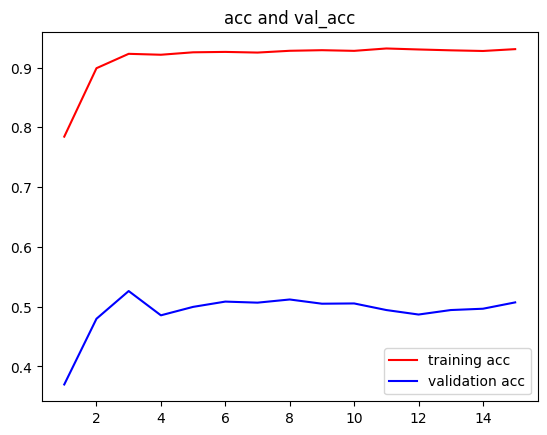

In [28]:
import matplotlib.pyplot as plt
plt.title('acc and val_acc')
plt.plot(epochs, acc, 'red', label='training acc')
plt.plot(epochs, val_acc, 'blue', label='validation acc')
plt.legend()#显示左上角的图例
plt.savefig("../img/Accuracy_ECT_16S.jpg")
plt.show()

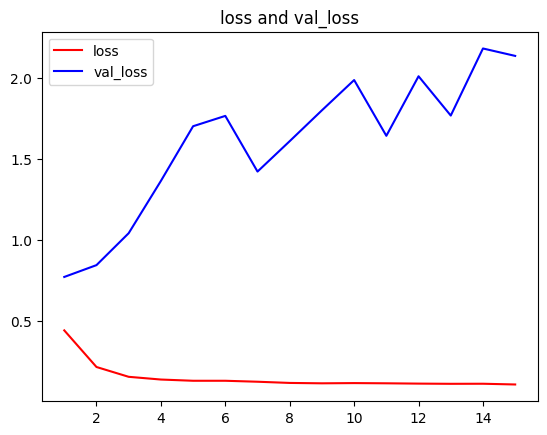

In [29]:
plt.title('loss and val_loss')
plt.plot(epochs, loss, 'red', label='loss')
plt.plot(epochs, val_loss, 'blue', label='val_loss')
plt.legend()
plt.savefig("../img/Loss_ECT_16S.jpg")
plt.show()

In [29]:
model.save('../model_save/'+model.name + "_ECT+16s_"+str(my_batch_size) + '_'+str(my_epochs)+'_'+str(my_validation_split)
           +'_'+str(test_result[1])[:4] + "_.h5")

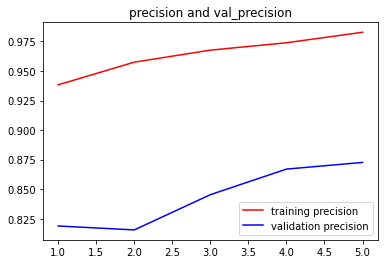

In [53]:
# plt.title('precision and val_precision')
# plt.plot(epochs, precision, 'red', label='training precision')
# plt.plot(epochs, val_precision, 'blue', label='validation precision')
# plt.legend()#显示左上角的图例
# plt.savefig("../img/Precision_ECT_16S.jpg")
# plt.show()

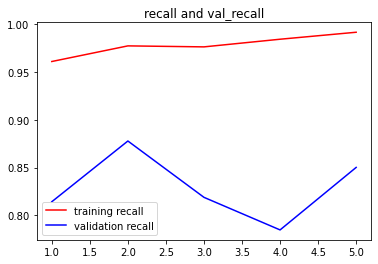

In [54]:
# plt.title('recall and val_recall')
# plt.plot(epochs, recall, 'red', label='training recall')
# plt.plot(epochs, val_recall, 'blue', label='validation recall')
# plt.legend()#显示左上角的图例
# plt.savefig("../img/Recall_ECT_16S.jpg")
# plt.show()

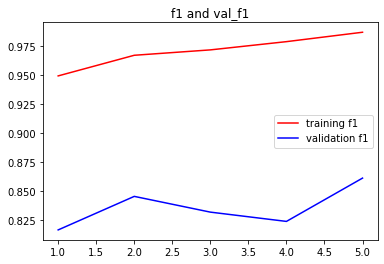

In [55]:
# plt.title('f1 and val_f1')
# plt.plot(epochs, f1, 'red', label='training f1')
# plt.plot(epochs, val_f1, 'blue', label='validation f1')
# plt.legend()#显示左上角的图例
# plt.savefig("../img/F1_ECT_16S.jpg")
# plt.show()

In [25]:
loaded_model = tf.keras.models.load_model('../model_save/model_ECT+16s_128_15_0.2_0.75_.h5')

In [30]:
x_test=np.array(x_test)
y_test=np.array(y_test)
long_ECT_code_test = np.array(long_ECT_code_test)
loss_,acc_ = loaded_model.evaluate([x_test,long_ECT_code_test],y_test)

ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {"<class 'numpy.ndarray'>"}), (<class 'list'> containing values of types {"<class 'int'>"})

In [34]:
loss_,acc_ = loaded_model.evaluate([x_train,long_ECT_code],y_train)

354/354 [==============================] - 82s 231ms/step - loss: 1.6671 - accuracy: 0.4481
